In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

In [4]:
!pip install opencv-python

(566, 402, 1)


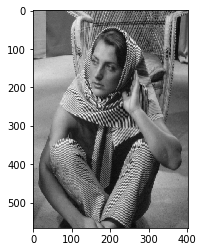

In [6]:
img = mpimg.imread("D:\Downloads\Domasna_rabota_metodologija\Barbara.tif")

def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)


if len(img.shape) < 3:
    img.resize(*img.shape,1)

imshow(img)

print(img.shape)

In [7]:
(512, 512, 1)

(512, 512, 1)

In [14]:
# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

(gfw,gfh) = (3,3)
gaussianFilter = gaussFilter((gfw,gfh),1)

print("Gaussian Filter")
print(gaussianFilter)

Gaussian Filter
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [ ]:
def conv(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)
print()
fig = plt.figure(2, figsize=(18, 16))
print("  Gaussian Filter ")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (gfw,gfh) = (i,i)
    gaussianFilter = gaussFilter((gfw,gfh),4)
    gaussian_image = conv(img, gaussianFilter)
    imshow(gaussian_image)
    cv2.imwrite("gaussian"+str(i)+"x"+str(i)+".jpg",gaussian_image)
plt.show()